<table align="left" style="border-style: hidden" class="table"> <tr> <td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Spring 2018</h4><p>Ani Adhikari</div></td></tr></table><!-- not in pdf -->

In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

# Homework 10 #

Your homework has two components: A (written work only) and B (also involving code). Each question or subpart is labeled accordingly. Written work should be completed on paper, and coding questions should be done in the notebook. It is your responsibility to ensure that your homework is submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

#### Rules for Written Homework ####

- Every answer should contain a calculation or reasoning. For example, a calculation such as $(1/3)(0.8) + (2/3)(0.7)$ is fine without further explanation or simplification. If we want you to simplify, we'll ask you to. But just ${5 \choose 2}$ is not fine; write "we need 2 out of the 5 frogs and they can appear in any order" or whatever reasoning you used. Reasoning can be brief and abbreviated, e.g. "product rule" or "not mut. excl."
- You may consult others but you must write up your own answers using your own words, notation, and sequence of steps.
- In the interest of saving trees, you do not need to *solve* each question on a new piece of paper. Folding the paper to show just the relevant problem will suffice. To ensure the correct page size, we recommend placing the folded part on a blank page before scanning, or adjusting the page settings on your phone scanning app.
- You will submit a scanned PDF to Gradescope. **Each question should *start* on a new PDF page. No page should contain two questions.**

#### Rules for Coding ####

- Do not share, copy, or allow others to copy your code. You may discuss your approach and relevant methods or functions to use.
- A code cell (which may contain starter code) is provided for each question or subpart that requires coding. You are free to add additional cells as needed.
- You will submit a PDF to Gradescope. See the bottom of the notebook for more instructions.
- Here is the Prob140 documentation [guide](https://probability.gitlab.io/prob140/index.html) for your reference.

### 1. Transformations of the Normal ###
Let $Z$ have the standard normal density.

**a)** Find the density of $\vert Z \vert$. Don't try to use a formula; just think about $P(\vert Z \vert \in dz)$ for positive $z$.

**b)** Find $E(\vert Z \vert)$. Calculating the integral is straightforward; you should just be able to recognize the indefinite integral.

**c) [CODE]** Plot the density of $\vert Z \vert$ and mark the expectation on the horizontal axis. In Data 8 you saw distributions of this shape when you simulated statistics such as "the absolute difference between the proportion of heads and 1/2".

In the cell below, assign $E(\vert Z \vert)$ to the name `ev`. Use `np.pi` for $\pi$.

In [ ]:
#answer to 1c
ev = ...
y = np.arange(0, 4.01, 0.01)
plt.plot(y, ..., color='darkblue', lw=2)
plt.scatter(ev, -0.01, marker = '^', color='red', s=50)
plt.xlabel('$y$')
plt.ylabel('Density at $y$')
plt.title('Density of $|Z|$')
plt.xlim(-0.1, 4)
plt.ylim(-0.01, 0.81);

**d)** A random variable whose log is normal is said to have a lognormal density. In the previous homework you examined the special case where the log is standard normal. Now let $X$ have the normal $(\mu, \sigma^2)$ density and let $Y = e^X$. Use the change of variable formula for densities to find the density of $Y$.

**e) [CODE]** Use a dark blue line to plot the lognormal density in the case $\mu = 0$, $\sigma = 1$. On the same axes, use a gold line to plot the lognormal density in the case $\mu = 0$, $\sigma = 0.5$. Use `np.log(w)` for $\log(w)$.

In [ ]:
#answer to 1e
y = np.arange(0, 7.01, 0.01)
plt.plot(y, stats.norm.pdf..., color='darkblue', lw=2)
plt.plot(y, stats.norm.pdf..., color='gold', lw=2)
plt.xlabel('$y$')
plt.ylabel('Density at $y$')
plt.title('Lognormal Densities');

#newpage

### 2. Cauchy Density ###
Part (a) is from Pitman's text, page 310, where you'll find a useful diagram. But note that I'm using $\Theta$ where he uses $\Phi$, to avoid confusion with the standard normal cdf.

**a)** Suppose that a particle is fired from the origin in the $(x, y)$-plane in a straight line in a direction at a random angle $\Theta$ to the $x$-axis. Let $Y$ be the $y$-coordinate of the point where the particle hits the line $x = 1$. Show that if $\Theta$ has the uniform distribution on $(-\pi/2, \pi/2)$, then the density of $Y$ is

$$
f_Y(y) ~ = ~ \frac{1}{\pi(1 + y^2)}, ~~~ - \infty < y < \infty
$$

This is called the *Cauchy* density.

**b) [CODE]** Plot the Cauchy density over the interval $(-5, 5)$ and overlay the standard normal curve. Use `'darkblue'` for the color of the one with heavier tails, and `'gold'` for the color of the other one.

[Use `stats.cauchy.pdf` for the Cauchy density function and `stats.norm.pdf` for the standard normal density function.]

**c)** For $Y$ with the Cauchy density, use calculus to show that $E(\lvert Y \rvert ) = \infty$. Thus $E(Y)$ is undefined even though the density of $Y$ is symmetric about 0.

The Cauchy curve is called the [Witch of Agnesi](https://en.wikipedia.org/wiki/Witch_of_Agnesi). Skim the History and Applications sections of the Wikipedia article.

**2d) [CODE]** Explain what is being plotted by the code below, and discuss what you see in the graph in relation to the Weak Law of Large Numbers. Run the cell several times before you answer. You should also vary $N$.

[`stats.cauchy.rvs(size = N)` returns an array of $N$ i.i.d. Cauchy random numbers.]

In [ ]:
#2d: run this
N = 10000
n = np.arange(1, N+1)
x = stats.cauchy.rvs(size = N)
y = np.cumsum(x)/n
plt.plot(n, y, color='darkblue', lw=2)
plt.plot([0, N], [0, 0], color='k', lw=2);

#newpage

### 3. Functions of Uniform Random Variables ###
Let $X$ and $Y$ have joint density

$$
f(x, y) = 
\begin{cases}
90(y-x)^8, ~~~~ 0 < x < y < 1 \\
0 ~~~~~~~~~~~~~~~~~~~~~ \text{otherwise}
\end{cases}
$$ 

In what follows, please do the calculus yourself. No `SymPy`.

**a)** Find $P(Y > 2X)$.

**b)** Find the marginal density of $X$.

**c)** Fill in the blanks (explain briefly):
The joint density $f$ above is the joint density of the $\underline{~~~~~~~~~~~~~~~~}$ and $\underline{~~~~~~~~~~~~~~~~}$ of ten independent uniform $(0, 1)$ random variables.


### 4. Functions of Exponential Random Variables ###
Let $X$ and $Y$ be independent exponential random variables with rates $\lambda$ and $\mu$ respectively.

**a)** Let $W = \min(X, Y)$. Find the density of $W$. Start by remembering which of the following is easiest when working with minima: the density, the cdf, or the survival function.

**b)** Let $c$ be a positive constant. Use the results about exponential random variables in Sections 16.1 and 17.2 of the Prob 140 textbook to find $P(X > cY)$ without integration.

**c)** Use part (b) to find the cdf of $\frac{X}{Y}$.

#newpage

### 5. The Gamma Densities ###
In this problem you will start with some calculus exercises and then develop one of the fundamental families of densities. Assume that $r > 0$ and $\lambda > 0$ are constants.

**a)** The *Gamma function* of mathematics is defined by
$$
\Gamma (r) ~ = ~ \int_0^\infty t^{r-1} e^{-t} dt
$$

That letter is the upper case Greek letter Gamma. You can assume that the integral converges and that therefore $\Gamma(r)$ is a positive number.

Use integration by parts to show that 
$$
\Gamma(r+1) ~ = ~ r\Gamma(r), ~~~ r > 0
$$

**b)** Use part (a) and induction to show that if $r$ is a positive integer then $\Gamma(r) = (r-1)!$. Thus the Gamma function is a continuous extension of the factorial function.

**c)** Let $X$ have density given by
$$
f_X(t) =
\begin{cases}
\frac{1}{\Gamma(r)} t^{r-1}e^{-t}, ~~~ t > 0 \\
0 ~~~~~~~~~~~~~~~~~~~~ \text{otherwise}
\end{cases}
$$

Let $Y = \frac{1}{\lambda} X$. Show that the density of $Y$ is

$$
f_Y(t) =
\begin{cases}
\frac{\lambda^r}{\Gamma(r)} t^{r-1}e^{-\lambda t}, ~~~ t > 0 \\
0 ~~~~~~~~~~~~~~~~~~~~ \text{otherwise}
\end{cases}
$$

This is called the gamma $(r, \lambda)$ density.

**d)** Use (c) and the formula in Section 16.3 of the Prob 140 textbook to confirm that if $Z$ has the standard normal density then $Z^2$ has the gamma $(1/2, 1/2)$ density. Hence find $\Gamma (1/2)$, and then use (a) to find $\Gamma (3/2)$ and $\Gamma (5/2)$. Please don't leave any integrals in your answers.

**e) [CODE]** Part (c) shows that the gamma $(r, \lambda)$ density is obtained as a change of scale (units of measurement) starting with a gamma $(r, 1)$ random variable and multiplying it by $1/\lambda$. That is why `stats` calls $1/\lambda$ the *scale parameter* of the gamma density. The parameter $r$ determines the shape of the curve and is called the *shape parameter*.

The method `stats.gamma.pdf` can be used with the following arguments to return the value of the density:
- the value of $t$ (possibly an array) at which to evaluate the density
- $r$
- $\lambda$ specified as `scale=1/`$\lambda$

Run the cell below to see overlaid graphs of the gamma $(1, 0.25)$ and gamma $(2, 0.25)$ densities.

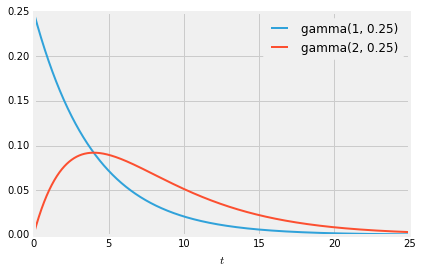

In [45]:
t = np.arange(0, 25, 0.01)
r_1 = stats.gamma.pdf(t, 1, scale=1/0.25)
r_2 = stats.gamma.pdf(t, 2, scale=1/0.25)
plt.plot(t, r_1, lw=2, label='gamma(1, 0.25)')
plt.plot(t, r_2, lw=2, label='gamma(2, 0.25)')
plt.xlabel('$t$')
plt.legend();

On a single graph, plot the gamma $(r, 0.25)$ densities for $r = 1, 1.5, 2, 2.5, 3$. You can write separate lines for each plot if you don't want to deal with string manipulations for creating labels automatically.

Use the code above as an example to make sure that your graph has a legend that shows which curve is which. Python will choose the colors for you.

In [ ]:
#answer to 5e
...

#newpage

### 6. Mean and Variance of the Gamma ###
As in Question 5, let $r$ and $\lambda$ be positive constants.

**a)** Use Question 5(c) and properties of densities to evaluate
$$
\int_0^\infty t^{r-1}e^{-\lambda t} dt
$$
in terms of $r$, $\lambda$, and the Gamma function. For what follows, keep in mind that your formula is correct for all positive $r$.

**b)** Let $T$ have gamma $(r, \lambda)$ density. Use (a) and 5(a) to find a simple formula for $E(T)$ in terms of $r$ and $\lambda$. Please don't leave any integrals in your answer.

**c)** For $T$ as in (b), find $E(T^2)$ and hence $Var(T)$. Again, there should be no integrals left in your answer.

**d)** Identify the gamma $(1, \lambda)$ density as one that has another famous name, and confirm that your answers to (b) and (c) are consistent with what you already know about that density.

## Checklist

Your submission should have the following parts:

#### Part A (Written)

- 1a, 1b, 1d
- 2a, 2c
- 3a, 3b, 3c
- 4a, 4b, 4c
- 5a, 5b, 5c, 5d
- 6a, 6b, 6c, 6d

#### Part B (Code)

- 1c, 1e
- 2b, 2d
- 5e

## Submission Instructions


#### Logistics 

1. Use a scanner or scanning app (such as CamScanner) to digitize your written assignments. Do not take pictures using your phone's camera app.
2. For code portions, examine the generated pdf before uploading to make sure that it contains all of your work.
3. When submitting to Gradescope, select the pages of your upload corresponding to each question. 
4. If you encounter any difficulties when submitting or exporting your assignment, please make a private Piazza post **before the deadline**. 

### **We will not grade assignments which do not have pages selected for each question, are illegibly scanned, or are submitted after 8PM.** 


#### Part A (Written)
- Make sure you have at least 6 pages of homework. Each problem should start on a new page; for example,  Problem 1 on page 1, Problem 2 on page 2, etc.
- Scan all the pages into a PDF. **Make sure the PDF page size is 8.5 x 11 inches**. It is your responsibility to check that all the work on the scanned pages is legible. You can use any scanner or a phone using applications such as CamScanner. Save the PDF.
- Upload the scanned PDF of your work onto Gradescope for the assignment "HW_03A". 
Refer to [this guide](http://gradescope-static-assets.s3-us-west-2.amazonaws.com/help/submitting_hw_guide.pdf) for detailed instructions about scanning and submitting, or consult course staff.

#### Part B (Code)

1. **Save your notebook using File > Save and Checkpoint.**
2. Run the cell below to generate a pdf file.
3. Download the pdf file and confirm that none of your work is missing or cut off.
4. Submit the assignment to "HW_03B" on Gradescope. Use the entry code "9GEKKD" if you haven't already joined the class.

In [ ]:
import gsExport
gsExport.generateSubmission("hw10.ipynb")